# 作业6-机器学习-聚类-KMeans练习
**作业要求：**

- 在Python Jupyter中回答，**需运行出结果**。
- 网页-打印-另存为pdf，命名：**作业6-班级-学号后两位-姓名.pdf**
- 按时上传职教云，**过期不补**。

## 任务说明
- 小明是一家超市的老板。通过会员卡，有一些关于客户的基本数据，如客户ID，年龄，性别，年收入和消费分数。小明想要了解怎么样的顾客可以很容易地聚集在一起(目标顾客)，以便可以给营销团队以灵感并相应地计划策略。
- 用到的数据集，含包有关客户的基本信息（ID，年龄，性别，收入，支出分数）。共有5个字段200行

## 任务内容：

1. 数据加载
2. 数据预处理
3. 构建模型
4. 模型评价和选择最优解
5. 数据可视化

In [58]:
# 导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook # 交互式

UsageError: unrecognized arguments: # 交互式


### 1. 加载数据

In [47]:
# 数据导入
data = pd.read_csv("./data/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [49]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### 2. 数据预处理

In [50]:
# 此案例仅选取后三列数值项作为特征，删除ID和性别, 共200条数据
data = data.drop(['CustomerID', 'Gender'], axis=1)
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


<IPython.core.display.Javascript object>


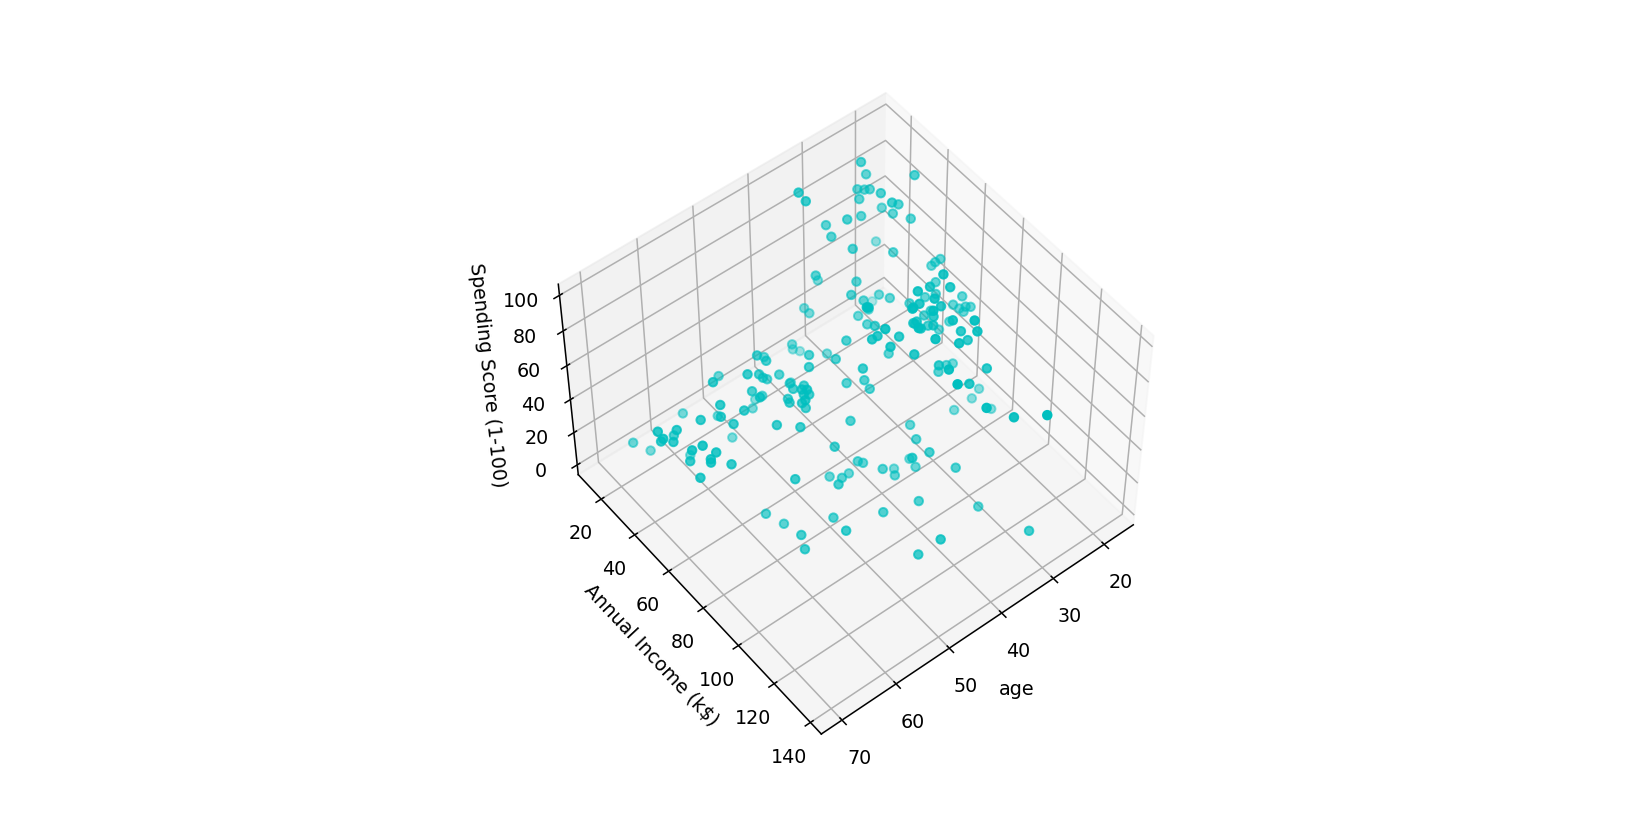

In [57]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'], marker='o', color='c')

ax.set_xlabel('age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.show()

<IPython.core.display.Javascript object>


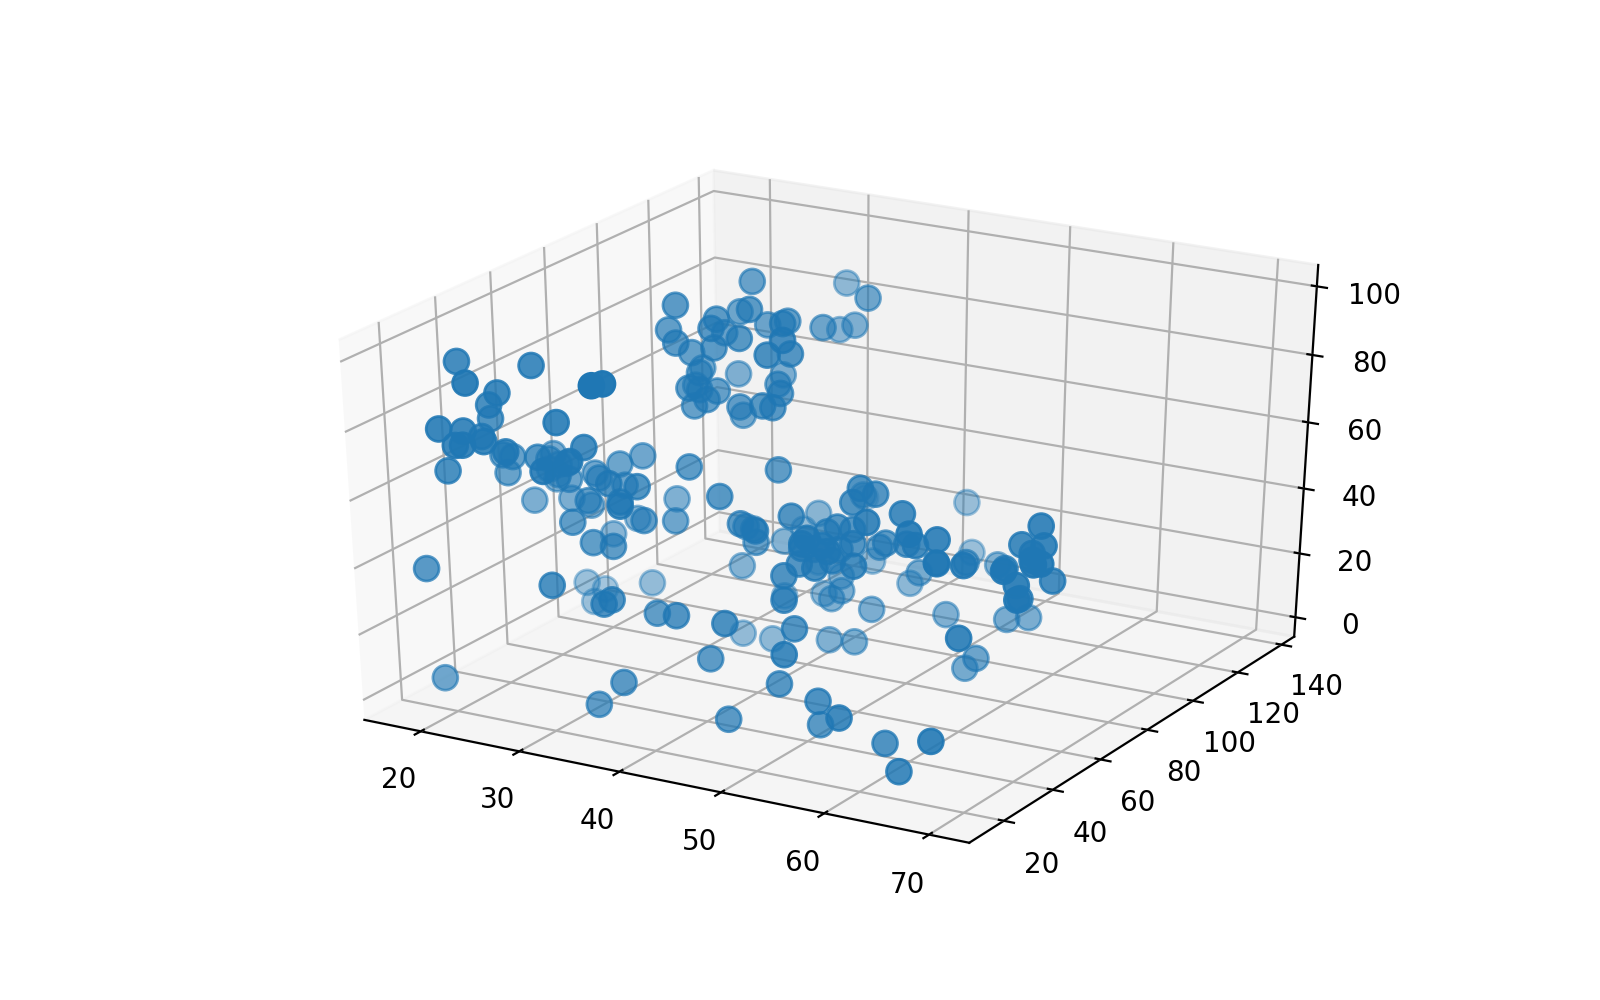

In [7]:
# 三维数据可视化
np.random.seed(19680801)
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for i in range(200):
    xs = data['Age'][i]
    ys = data['Annual Income (k$)'][i]
    zs = data['Spending Score (1-100)'][i]
    ax.scatter(xs, ys, zs, marker='o', color='c')
    
ax.set_xlabel('age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.show()

### 3. 构建模型

In [30]:
# 从K=2，尝试2,3,4...10个簇
# 轮廓系数列表
# 簇内平方和列表
from sklearn.metrics import silhouette_score # 轮廓系数
sc = []
wcss = []

for i in np.arange(2, 11):
    km = KMeans(n_clusters=i)
    km.fit(data)
    sc.append(silhouette_score(data, km.labels_))
    wcss.append(km.inertia_)
print('轮廓系数结果: ', sc)
print('簇内平方和分别是：', wcss)

轮廓系数结果:  [0.293166070535953, 0.3839349967742105, 0.40546302077733304, 0.44504314844253573, 0.4523443947724053, 0.4398198217929885, 0.42815090426876606, 0.39858908894838324, 0.3796680896271529]
簇内平方和分别是： [212840.16982097193, 143342.75157170597, 104366.151455562, 75363.74835182933, 58300.443321590676, 51118.949931647316, 44346.91278879018, 40805.75561874034, 37382.81287088391]


<IPython.core.display.Javascript object>


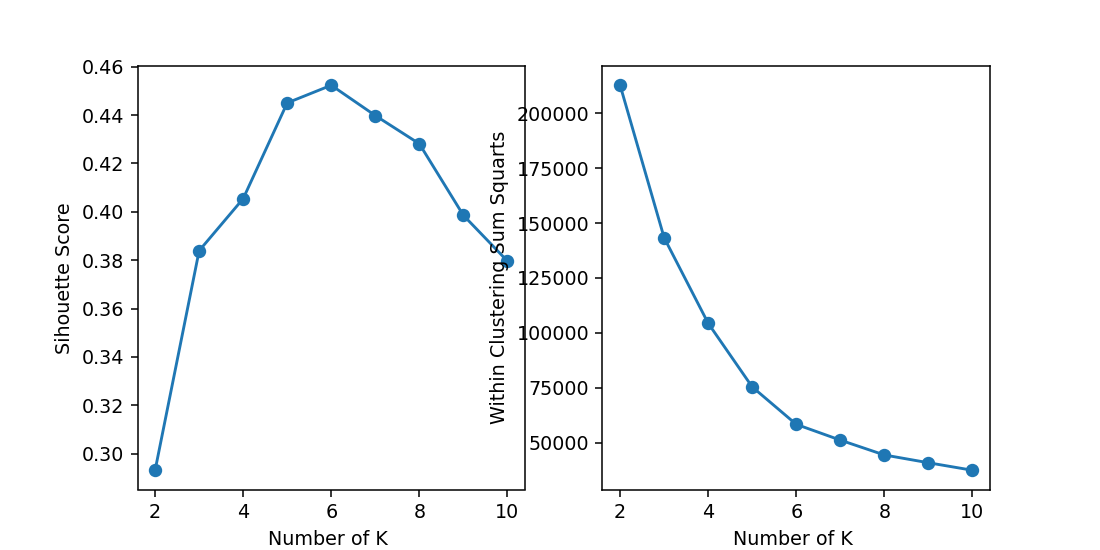

Text(0, 0.5, 'Within Clustering Sum Squarts')

In [60]:
# 轮廓系数和簇内平方和的可视化
plt.figure(figsize=(8, 4))

x = np.arange(2,11)

plt.subplot(1, 2, 1)
plt.plot(x, sc, marker='o')
plt.xlabel("Number of K ")
plt.ylabel("Sihouette Score")


plt.subplot(1, 2, 2)
plt.plot(x, wcss, marker='o')


plt.xlabel("Number of K ")
plt.ylabel("Within Clustering Sum Squarts")

### 选择 K = 6 进行建模

In [61]:
# （1）初始化聚类器，指定分簇的数量K=6
km = KMeans(n_clusters=6)
# （2）训练数据
km.fit(data)
# （3）得到簇中心向量

print('计算得到的6个簇的中心分别是：\n', km.cluster_centers_)
print('共计迭代次数:', km.n_iter_)

# （4）每个样本所属的簇
label = km.predict(data)
print('每个样本所属的簇：\n', label)

# (5) 轮廓系数
print('模型的轮廓系数为：\n', silhouette_score(data, km.labels_))

计算得到的6个簇的中心分别是：
 [[25.27272727 25.72727273 79.36363636]
 [41.68571429 88.22857143 17.28571429]
 [32.69230769 86.53846154 82.12820513]
 [56.15555556 53.37777778 49.08888889]
 [44.14285714 25.14285714 19.52380952]
 [27.         56.65789474 49.13157895]]
共计迭代次数: 7
每个样本所属的簇：
 [4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 3 0 3 5 4 0 3 5 5 5 3 5 5 3 3 3 3 3 5 3 3 5 3 3 3 5 3 3 5 5 3 3 3 3
 3 5 3 5 5 3 3 5 3 3 5 3 3 5 5 3 3 5 3 5 5 5 3 5 3 5 5 3 3 5 3 5 3 3 3 3 3
 5 5 5 5 5 3 3 3 3 5 5 5 2 5 2 1 2 1 2 1 2 5 2 1 2 1 2 1 2 1 2 5 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
模型的轮廓系数为：
 0.4523443947724053


<IPython.core.display.Javascript object>


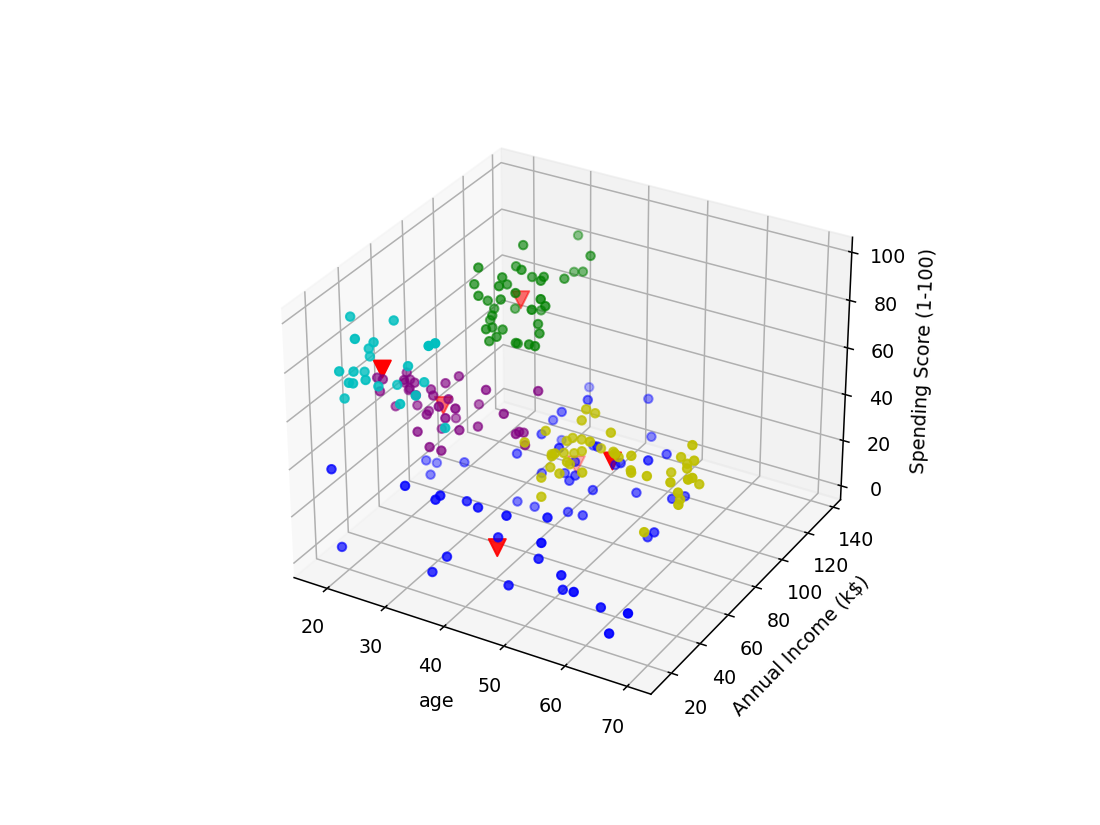

In [67]:
# 将三维数据点画图显示出来
color_list = np.array(['c','b','g','y','b', 'purple'])
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')

ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'], marker='o', color=color_list[label])

ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], km.cluster_centers_[:, 2], s=80, color='r', marker='v')

ax.set_xlabel('age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.show()

<IPython.core.display.Javascript object>


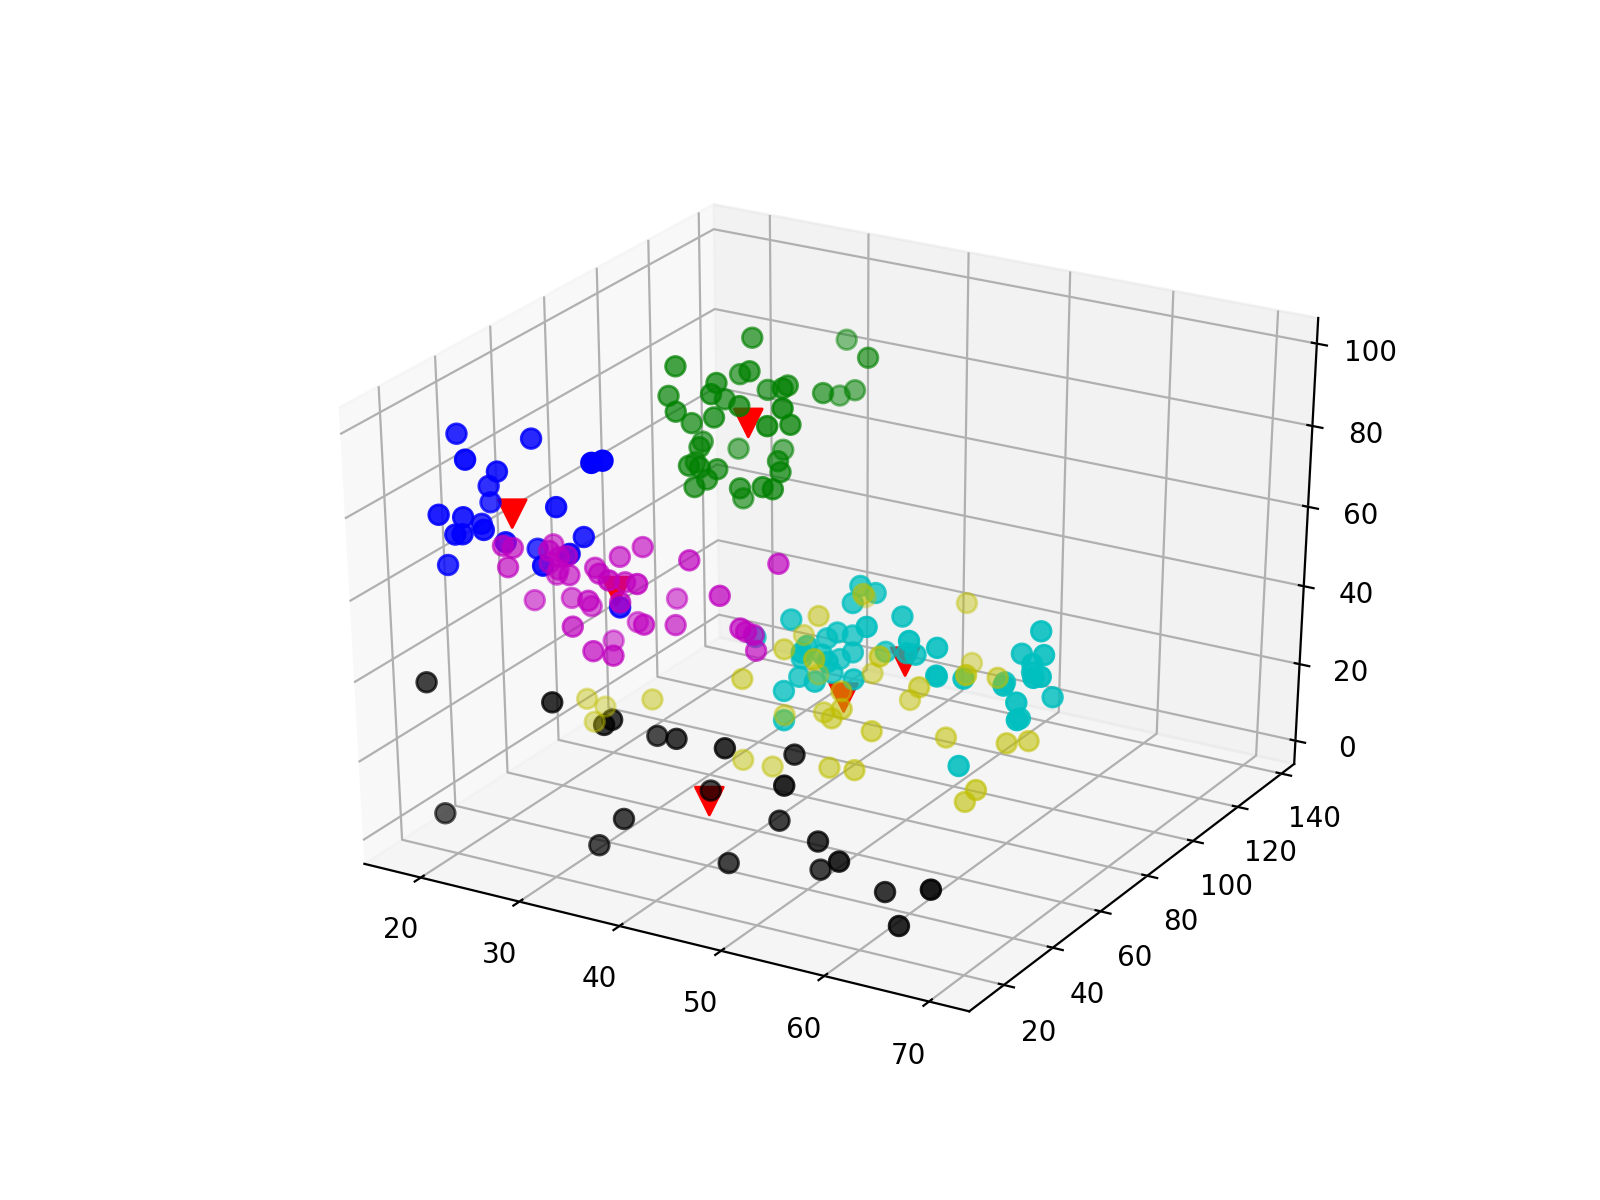

## 选做：试试看这个数据集的聚类

In [75]:
from sklearn.datasets import make_circles
# X: 二维数据
# y：真实的分类情况
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)

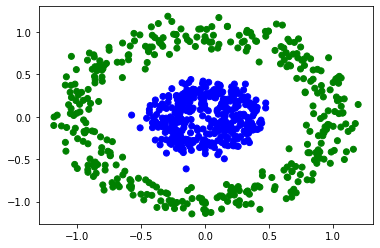

In [77]:
%matplotlib inline
color_list = np.array(['g', 'b'])
plt.scatter(X[:,0], X[:,1], color=color_list[y])

In [82]:
# （1）初始化聚类器，指定分簇的数量K=2
km2 = KMeans(n_clusters=2)
# （2）训练数据
km2.fit(X)
# （3）得到簇中心向量
km2_center = km2.cluster_centers_
print('计算得到的2个簇的中心分别是：\n', km2_center)
# （4）每个样本所属的类
label2 = km2.labels_
# (5) 轮廓系数
print('模型的轮廓系数为：\n', silhouette_score(X, label2))

计算得到的2个簇的中心分别是：
 [[ 0.3308212   0.19813998]
 [-0.38504663 -0.24691239]]
模型的轮廓系数为：
 0.292821384030695


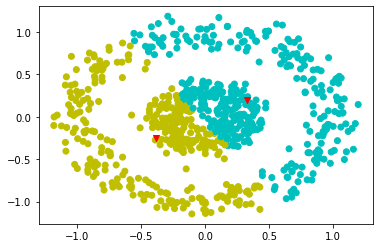

In [92]:
# 将三维数据点画图显示出来
%matplotlib inline
color_list = np.array(['c', 'y'])
plt.scatter(X[:, 0], X[:, 1], color=color_list[km2.labels_])
plt.scatter(km2_center[:, 0], km2_center[:, 1], marker='v', color='r')

## 我们知道应该分两个簇，内圈一个，外圈一个，但是KMeans解决不了这个问题，得试试其他算法了，《机器学习与深度学习》的课上请认真学习哦。

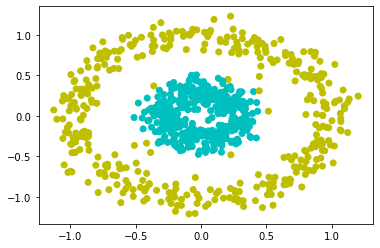

In [86]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()
lgr.fit(X, y)
lgr.coef_, lgr.intercept_

(array([[ 0.00971675, -0.01915383]]), array([-0.00014101]))

In [87]:
y_pred = lgr.predict(X)

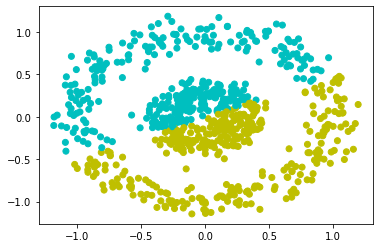

In [88]:
color_list = np.array(['c', 'y'])
plt.scatter(X[:, 0], X[:, 1], color=color_list[y_pred])